In [1]:
import cv2
import pandas as pd 
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [2]:
img = cv2.imread('sample_lane.jpg',1)

In [3]:
print(img)

[[[209 191 174]
  [175 154 133]
  [171 144 118]
  ...
  [ 98  72  32]
  [ 61  41   6]
  [ 62  45  12]]

 [[173 152 131]
  [165 141 117]
  [157 127 100]
  ...
  [148 119  75]
  [108  85  47]
  [ 57  37   2]]

 [[170 143 116]
  [160 130 101]
  [159 124  91]
  ...
  [162 128  82]
  [149 120  76]
  [100  75  33]]

 ...

 [[115 117 128]
  [ 87  89 100]
  [ 80  81  95]
  ...
  [ 67  70  85]
  [ 85  85 101]
  [117 117 133]]

 [[135 135 147]
  [108 110 121]
  [ 89  91 102]
  ...
  [ 73  76  91]
  [109 109 125]
  [134 135 149]]

 [[177 177 189]
  [132 132 144]
  [116 118 129]
  ...
  [109 112 127]
  [131 132 146]
  [176 177 191]]]


In [4]:
cv2.imshow('sample_image',img)
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

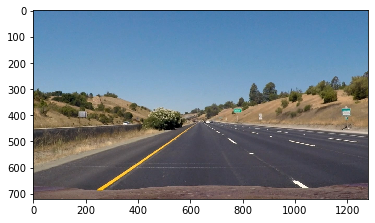

In [6]:
plt.imshow(img)
plt.show()

In [7]:
print(img.shape)

(720, 1280, 3)


In [8]:
#copying part of image

new_img = img.copy()
tree = new_img[358:472, 400:600]  #[y,x]
new_img[358:472, 800:1000] = tree

<function matplotlib.pyplot.show(*args, **kw)>

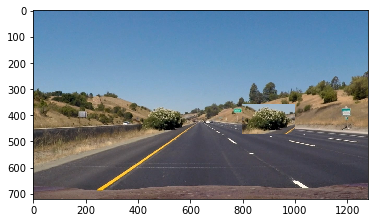

In [9]:
plt.imshow(new_img)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

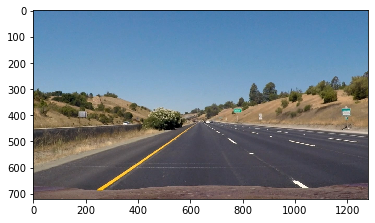

In [10]:
plt.imshow(img)
plt.show

# Applying Gaussian Blur

In [11]:
blur = cv2.GaussianBlur(img,(5,5), cv2.BORDER_DEFAULT)
cv2.imshow("blurred_image", blur)
cv2.waitKey(8000)
cv2.destroyAllWindows()

# Canny Edge Detection

In [12]:
canny = cv2.Canny(blur, 50, 200)

In [13]:
cv2.imshow("result", canny)
cv2.waitKey(8000)
cv2.destroyAllWindows()

# Masking image

In [14]:
height = img.shape[0]
width = img.shape[1]

In [15]:
region_of_interest_vertices = np.array([[
    (0,height),
    (635,422),
    (1150,height)
]])

In [16]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, (255,255,255))
    return mask

img2 = region_of_interest(img, region_of_interest_vertices)
cv2.imshow("", img2)
cv2.waitKey(5000)
cv2.destroyAllWindows()    

# Bit-wise AND

In [34]:
img3 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
masked_image = cv2.bitwise_and(canny, img3)
cv2.imshow("",masked_image)
cv2.waitKey(8000)
cv2.destroyAllWindows()

In [18]:
img3.shape

(720, 1280)

In [19]:
canny.shape

(720, 1280)

# Hough Transform

In [113]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    line_image = cv2.cvtColor(line_image, cv2.COLOR_GRAY2RGB)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)         #reshaping 2D array into 4 single dimension variables
            cv2.line(line_image, (x1, y1), (x2, y2), (0,255,200), 10)    #Draws a line from point A to point B on image
    return line_image

In [114]:
lines = cv2.HoughLinesP(masked_image, 2, np.pi/180, 100, np.array([]), minLineLength = 10, maxLineGap = 5)

In [115]:
line_image2 = display_lines(masked_image, lines)
cv2.imshow("",line_image2)
cv2.waitKey(6000)
cv2.destroyAllWindows()

In [116]:
result = cv2.bitwise_or(img, line_image2)
cv2.imshow("Final_result",result)
cv2.waitKey(5000)
cv2.destroyAllWindows()

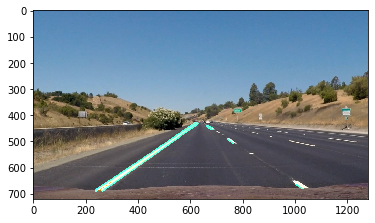

In [117]:
plt.imshow(result)